In [1]:
!export CUDA_VISIBLE_DEVICES=0,1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [39]:
df = pd.read_csv("/home/nsangph/data_sci_2025/Intro-To-ML-Proj/data/feature_eng_encode_dropcols_v9.csv")
df

,Booking Status,Avg VTAT,Avg CTAT,Driver Ratings,Customer Rating,hour,day_of_week,is_weekend,month,day,...,Vehicle Type_Uber XL,Vehicle Type_eBike,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_No Payment,Payment Method_UPI,Payment Method_Uber Wallet,day_time_Evening,day_time_Morning,day_time_Night
0,No Driver Found,0.0,0.0,0.0,0.0,12,5,1,3,23,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Incomplete,4.9,14.0,0.0,0.0,18,4,0,11,29,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Completed,13.4,25.8,4.9,4.9,8,4,0,8,23,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Completed,13.1,28.5,4.6,5.0,17,0,0,10,21,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Completed,5.3,19.6,4.1,4.3,22,0,0,9,16,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,Completed,10.2,44.4,3.7,4.1,19,0,0,11,11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
149996,Completed,5.1,30.8,4.8,5.0,15,6,1,11,24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
149997,Completed,2.7,23.4,3.9,4.4,10,2,0,9,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149998,Completed,6.9,39.6,4.1,3.7,7,5,1,10,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [4]:
# %pip install imblearn

In [5]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# For SMOTE and advanced techniques
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

In [40]:
if df['Booking Status'].dtype == 'object':
    # Create mapping from string to numeric
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['Booking Status'] = le.fit_transform(df['Booking Status'])
 
    print(f"Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
else:
    print("Column 'Booking Status' is already numeric.")

Mapping: {'Cancelled by Customer': np.int64(0), 'Cancelled by Driver': np.int64(1), 'Completed': np.int64(2), 'Incomplete': np.int64(3), 'No Driver Found': np.int64(4)}


In [41]:
X = df.drop('Booking Status', axis=1)
y = df['Booking Status']

# Split into train and test (important: resample only training data!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (120000, 36)
Test set shape: (30000, 36)


In [8]:
# sampling_strategy = {
#     0: 30000,  # Custom count for class 0
#     1: 30000,  # Custom count for class 1
#     2: 46000,  # Keep class 2 as is (majority)
#     3: 30000,  # Custom count for class 3
#     4: 30000   # Custom count for class 4
# }


In [42]:
class_counts = Counter(y_train)
median_count = int(np.median(list(class_counts.values())))
print(f"\nMedian class count: {median_count}")

downsample_strategy_partial = {
    cls: min(count, median_count) 
    for cls, count in class_counts.items()
}

rus_partial = RandomUnderSampler(sampling_strategy=downsample_strategy_partial, random_state=42)
X_resampled, y_resampled = rus_partial.fit_resample(X_train, y_train)

print(f"\nAfter Partial Downsampling (to median):")
print(f"Shape: {X_resampled.shape}")
print(Counter(y_resampled))


Median class count: 8400

After Partial Downsampling (to median):
Shape: (40800, 36)
Counter({0: 8400, 1: 8400, 2: 8400, 4: 8400, 3: 7200})


In [10]:
# ros_custom = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
# X_resampled, y_resampled = ros_custom.fit_resample(X_train, y_train)

In [ ]:
# # Combine train and test for consistent transformation
# data = pd.concat([X_resampled, X_test], axis=0)
# data

,Avg VTAT,Avg CTAT,Driver Ratings,Customer Rating,hour,day_of_week,is_weekend,month,day,hour_sin,...,Vehicle Type_Uber XL,Vehicle Type_eBike,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_No Payment,Payment Method_UPI,Payment Method_Uber Wallet,day_time_Evening,day_time_Morning,day_time_Night
26521,12.7,26.20,0.0,0.0,4,2,0,6,26,8.660254e-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99155,18.4,26.80,0.0,0.0,18,4,0,4,19,-1.000000e+00,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
119844,19.4,26.85,0.0,0.0,22,4,0,1,5,-5.000000e-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
107145,13.6,26.90,0.0,0.0,13,5,1,7,20,-2.588190e-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87899,10.8,26.80,0.0,0.0,18,5,1,2,24,-1.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23040,4.7,31.40,4.6,4.2,15,5,1,4,6,-7.071068e-01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41818,7.9,24.50,3.6,4.2,12,2,0,7,24,1.224647e-16,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136464,3.3,22.00,4.1,4.6,23,4,0,10,18,-2.588190e-01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
120390,4.0,28.10,0.0,0.0,22,3,0,12,12,-5.000000e-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
# Apply PCA
# n_components = min(30, data.shape[1], len(data)-1)
# print(f"Applying PCA with {n_components} components...")
# pca = PCA(n_components= 0.9, random_state=4)
# data_pca = pca.fit_transform(data)

# # Apply StandardScaler
# print("Applying StandardScaler...")
# data_scaled = StandardScaler().fit_transform(data_pca)

# # Split back into train and test
# train_scaled = data_scaled[:len(X_resampled)]
# test_scaled = data_scaled[len(X_resampled):]

# print(f"Train shape after PCA: {train_scaled.shape}")
# print(f"Test shape after PCA: {test_scaled.shape}")
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# PCA after scaling
pca = PCA(n_components=0.9, random_state=42)
X_resampled_pca = pca.fit_transform(X_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_scaled = X_resampled_pca
test_scaled = X_test_pca

print(f"PCA reduced to {train_scaled.shape[1]} components explaining {pca.explained_variance_ratio_.sum():.2f} variance")
# Initialize prediction arrays
n_classes = len(np.unique(y_resampled))
oof = np.zeros((len(train_scaled), n_classes))
preds_test = np.zeros((len(test_scaled), n_classes))

PCA reduced to 22 components explaining 0.92 variance


In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.svm import NuSVC

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

Testing k values from 1 to 50...
k= 1: Accuracy=0.8503
k= 2: Accuracy=0.7834
k= 3: Accuracy=0.8372
k= 4: Accuracy=0.8131
k= 5: Accuracy=0.8339
k= 6: Accuracy=0.8186
k= 7: Accuracy=0.8337
k= 8: Accuracy=0.8193
k= 9: Accuracy=0.8340
k=10: Accuracy=0.8240
k=11: Accuracy=0.8318
k=12: Accuracy=0.8239
k=13: Accuracy=0.8316
k=14: Accuracy=0.8220
k=15: Accuracy=0.8299
k=20: Accuracy=0.8223
k=25: Accuracy=0.8216
k=30: Accuracy=0.8157
k=35: Accuracy=0.8157
k=40: Accuracy=0.8147
k=45: Accuracy=0.8126
k=50: Accuracy=0.8114
Best k: 1 with accuracy: 0.8503


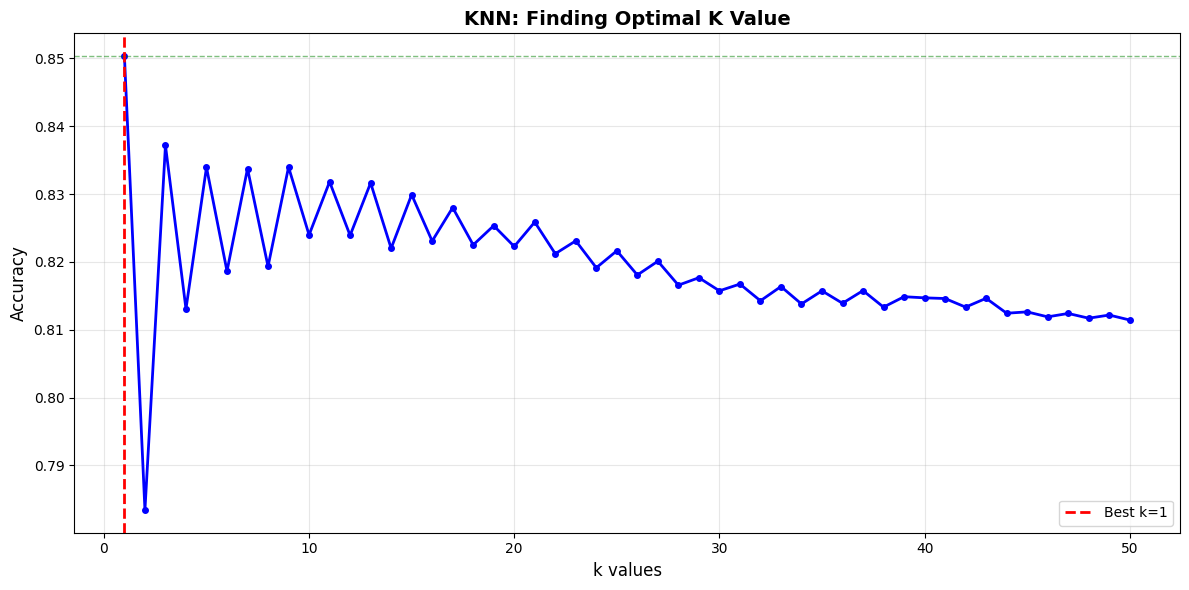

In [ ]:
print("Testing k values from 1 to 50...")
score_list = []
k_range = range(1, 21)

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(train_scaled, y_resampled)  
    score = knn_temp.score(test_scaled, y_test)
    score_list.append(score)
    
    if k <= 15 or k % 5 == 0:  # Print selected k values
        print(f"k={k:2d}: Accuracy={score:.4f}")

# Find best k
best_k = k_range[np.argmax(score_list)]
best_accuracy = max(score_list)

print(f"Best k: {best_k} with accuracy: {best_accuracy:.4f}")

# Plot k vs accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, score_list, 'b-', linewidth=2, marker='o', markersize=4)
plt.axvline(x=best_k, color='r', linestyle='--', linewidth=2, label=f'Best k={best_k}')
plt.axhline(y=best_accuracy, color='g', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel("k values", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("KNN: Finding Optimal K Value", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
n_splits = 11
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

print(f"Using {n_splits}-fold Stratified K-Fold Cross-Validation")
print("Training models...\n")

for fold, (train_index, val_index) in enumerate(skf.split(train_scaled, y_resampled)):
    print(f"Fold {fold+1}/{n_splits}...", end=" ")
    # kernel = 'rbf'
    # clf = NuSVC(probability=True, kernel='poly', degree=4, 
    #             gamma='auto', random_state=4, nu=0.4, coef0=0.08)
    clf = KNeighborsClassifier(n_neighbors=best_k, weights='distance', n_jobs=-1)
    # clf = RandomForestClassifier(
    #     n_estimators=100,
    #     max_depth=10,
    #     class_weight='balanced',
    #     random_state=4,
    #     n_jobs=-1
    # )
    # Fit model
    clf.fit(train_scaled[train_index], y_resampled.iloc[train_index])
    
    # Out-of-fold predictions
    oof[val_index] = clf.predict_proba(train_scaled[val_index])
    
    # Test predictions (average across folds)
    preds_test += clf.predict_proba(test_scaled) / n_splits
    

# Get final predictions
train_pred = np.argmax(oof, axis=1)
test_pred = np.argmax(preds_test, axis=1)

Using 11-fold Stratified K-Fold Cross-Validation
Training models...

Fold 1/11... Fold 2/11... Fold 3/11... Fold 4/11... Fold 5/11... Fold 6/11... Fold 7/11... Fold 8/11... Fold 9/11... Fold 10/11... Fold 11/11... 

In [23]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [24]:
# training
print(f"Accuracy: {accuracy_score(y_resampled, train_pred):.4f}")
print(f"F1-Score (Macro): {f1_score(y_resampled, train_pred, average='macro'):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_resampled, train_pred, average='weighted'):.4f}")
# test
print(f"Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print(f"F1-Score (Macro): {f1_score(y_test, test_pred, average='macro'):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, test_pred, average='weighted'):.4f}")



Accuracy: 0.8235
F1-Score (Macro): 0.8306
F1-Score (Weighted): 0.8260
Accuracy: 0.8503
F1-Score (Macro): 0.7874
F1-Score (Weighted): 0.8625


In [25]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.35      0.63      0.45      2100
           1       0.68      0.63      0.65      5400
           2       1.00      0.91      0.95     18600
           3       0.93      0.99      0.96      1800
           4       0.87      0.99      0.93      2100

    accuracy                           0.85     30000
   macro avg       0.77      0.83      0.79     30000
weighted avg       0.88      0.85      0.86     30000



## Kmeans - find optimal k

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

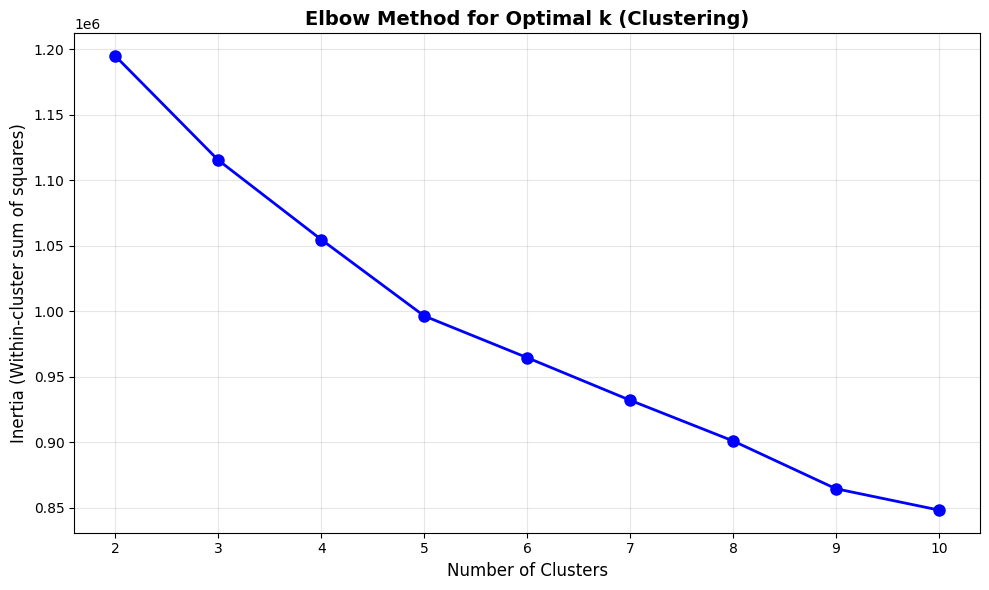

In [44]:
inertia = []
k_range_cluster = range(2, 11)

for n_clusters in k_range_cluster:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(train_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range_cluster, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('Elbow Method for Optimal k (Clustering)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_elbow.png', dpi=300)
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(train_scaled)
    score = silhouette_score(train_scaled, labels)
    print(f"k={k}, silhouette={score:.3f}")
## should be closer to 1

k=2, silhouette=0.111
k=3, silhouette=0.141
k=4, silhouette=0.117
k=5, silhouette=0.098
k=6, silhouette=0.096
k=7, silhouette=0.103
k=8, silhouette=0.112
k=9, silhouette=0.118
k=10, silhouette=0.110
